<a href="https://colab.research.google.com/github/Sanjaykumar030/MY_First_ML_Model/blob/draft/My_First_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reading the file**

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Chennai houseing sale.csv to Chennai houseing sale.csv


In [4]:

import pandas as pd
read = pd.read_csv("Chennai houseing sale.csv")
read.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **Import**

In [5]:
# Basic Libraries
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split

# XGBoost Regressor
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv("Chennai houseing sale.csv")
df.head()
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

# **Modelling**

### Training and Testing

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode AREA with LabelEncoder (high cardinality)
le = LabelEncoder()
df['AREA_encoded'] = le.fit_transform(df['AREA'])

# Date feature engineering with dayfirst=True
df['BUILD_AGE'] = 2025 - pd.to_datetime(df['DATE_BUILD'], dayfirst=True).dt.year
df['SALE_MONTH'] = pd.to_datetime(df['DATE_SALE'], dayfirst=True).dt.month

# Interaction feature
df['SQFT_x_QS_OVERALL'] = df['INT_SQFT'] * df['QS_OVERALL']

# One-Hot encode the categorical features with limited categories
df = pd.get_dummies(df, columns=['SALE_COND', 'BUILDTYPE', 'UTILITY_AVAIL', 'MZZONE'], drop_first=True)

# Now select all numeric + encoded features
feature_columns = [
    'INT_SQFT',
    'DIST_MAINROAD',
    'N_BEDROOM',
    'N_BATHROOM',
    'N_ROOM',
    'QS_ROOMS',
    'QS_BATHROOM',
    'QS_BEDROOM',
    'QS_OVERALL',
    'AREA_encoded',
    'BUILD_AGE',
    'SALE_MONTH',
    'SQFT_x_QS_OVERALL'
]

# Add all the new one-hot columns automatically
one_hot_cols = [col for col in df.columns if col.startswith(('SALE_COND_', 'BUILDTYPE_', 'UTILITY_AVAIL_', 'MZZONE_'))]
feature_columns.extend(one_hot_cols)

# Prepare feature matrix and target
X = df[feature_columns]
y = df['SALES_PRICE']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(random_state=42)

#Training model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## **Prediction**

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print("R-squared:", r2)

Mean Squared Error: 614513704960.00
R-squared: 0.9532241225242615


## **Graph**

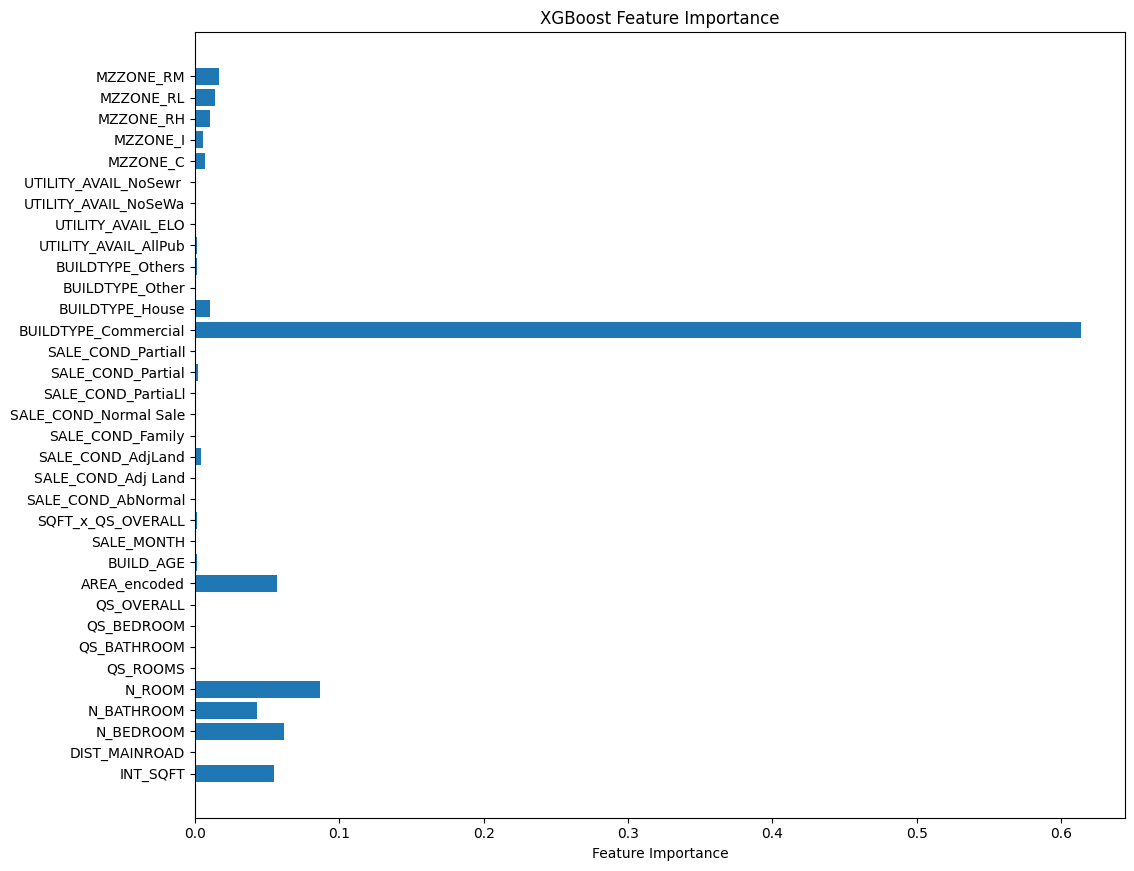

In [10]:
import matplotlib.pyplot as plt

# Get feature importance scores
importance = model.feature_importances_

# Plot
plt.figure(figsize=(12, max(6, len(X.columns)*0.3)))  # Adjust height per feature
plt.barh(X.columns, importance)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()



# New Sample House

In [35]:
# Your raw new house data
new_house_raw = {
    'INT_SQFT': 1200,
    'DIST_MAINROAD': 5.5,
    'N_BEDROOM': 3,
    'N_BATHROOM': 2,
    'N_ROOM': 5,
    'QS_ROOMS': 7,
    'QS_BATHROOM': 7,
    'QS_BEDROOM': 7,
    'QS_OVERALL': 7,
    'AREA': 'Karapakkam', # Example area
    'DATE_BUILD': '15-05-2015', # Example build date
    'DATE_SALE': '01-06-2024', # Example sale date
    'SALE_COND': 'Normal Sale', # Example sale condition
    'BUILDTYPE': 'House', # Example build type
    'UTILITY_AVAIL': 'AllPub', # Example utility availability
    'MZZONE': 'RH', # Example MZZONE
}

# Create a DataFrame from the raw data
new_df_raw = pd.DataFrame([new_house_raw])

# Apply the same feature engineering steps as the training data

# Encode AREA with the same LabelEncoder used for training
# Need to ensure the new area is in the encoder's classes, handle unseen areas if necessary
try:
    new_df_raw['AREA_encoded'] = le.transform(new_df_raw['AREA'])
except ValueError as e:
    print(f"Error encoding AREA: {e}")
    print(f"Known classes for AREA: {list(le.classes_)}")
    # Handle unseen areas - e.g., assign a default value or raise an error
    # For now, we will assume the area is known or will cause an error if not.
    raise

new_df_raw['BUILD_AGE'] = 2025 - pd.to_datetime(new_df_raw['DATE_BUILD'], format='%d-%m-%Y').dt.year
new_df_raw['SALE_MONTH'] = pd.to_datetime(new_df_raw['DATE_SALE'], format='%d-%m-%Y').dt.month
new_df_raw['SQFT_x_QS_OVERALL'] = new_df_raw['INT_SQFT'] * new_df_raw['QS_OVERALL']

# One-Hot encode the categorical features with the same columns as the training data
# This will ensure all dummy columns are present, even if the value is 0
new_df = pd.get_dummies(new_df_raw, columns=['SALE_COND', 'BUILDTYPE', 'UTILITY_AVAIL', 'MZZONE'], drop_first=True)

# Reindex new_df to match the columns of the training data (X_train)
# Fill missing columns with 0
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

In [36]:
predicted_price = model.predict(new_df)

formatted_price = "₹{:,.2f}".format(predicted_price[0])
print(f"Predicted Price: {formatted_price}")

Predicted Price: ₹7,340,446.00
